In [5]:
from math import floor
from random import random, randint
!pip install matplotlib
!pip install sklearn
!pip install tensorflow


"pip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"pip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"pip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
from typing import List
from sklearn.preprocessing import OneHotEncoder
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import random
%matplotlib inline

In [7]:
with gzip.open('train-labels-idx1-ubyte.gz') as train_labels:
    data_from_train_file = train_labels.read()

# пропускаем первые 8 байт
label_data = data_from_train_file[8:]
assert len(label_data) == 60000

# конвертируем каждый байт в целое число.
# это будет число от 0 до 9
labels = [int(label_byte) for label_byte in label_data]
assert min(labels) == 0 and max(labels) == 9
assert len(labels) == 60000

In [8]:
SIZE_OF_ONE_IMAGE = 28 ** 2 # размер картинки - 28 на 28 пикселей
images = []

# перебор тренировочного файла и чтение одного изображения за раз
with gzip.open('train-images-idx3-ubyte.gz') as train_images:
    train_images.read(4 * 4)
    ctr = 0
    for _ in range(60000):
        image = train_images.read(size=SIZE_OF_ONE_IMAGE)
        assert len(image) == SIZE_OF_ONE_IMAGE

        # Конвертировать в NumPy
        image_np = np.frombuffer(image, dtype='uint8') / 255
        images.append(image_np)

images = np.array(images)
images.shape

(60000, 784)

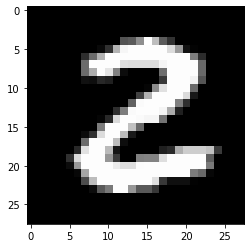

In [9]:
# создаём метод для вывода картинки
def plot_image(pixels: np.array):
    plt.imshow(pixels.reshape((28, 28)), cmap='gray')
    plt.show()

# выводим картинку для проверки
plot_image(images[25])

In [10]:
labels_np = np.array(labels).reshape((-1, 1))

encoder = OneHotEncoder(categories='auto')
labels_np_onehot = encoder.fit_transform(labels_np).toarray()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_np_onehot)
print(y_train.shape)
print(y_test.shape)

(45000, 10)
(15000, 10)


In [12]:
# создаём модель свёрточной нейросети
model = keras.Sequential()
model.add(keras.layers.Dense(input_shape=(SIZE_OF_ONE_IMAGE,), units=128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
# обучаем нейросеть
model.fit(X_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
352/352 [==============================] - 1s 857us/step - loss: 1.7203 - accuracy: 0.5035
Epoch 2/20
352/352 [==============================] - 0s 897us/step - loss: 0.7028 - accuracy: 0.8375

In [14]:
# тестируем нейросеть
model.evaluate(X_test, y_test)

469/469 [==============================] - 0s 527us/step - loss: 0.2641 - accuracy: 0.9249


[0.26412975788116455, 0.9248666763305664]

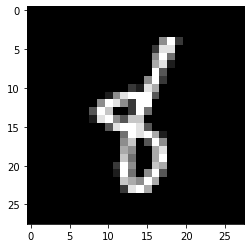

0: 0%
1: 49%
2: 0%
3: 4%
4: 9%
5: 16%
6: 8%
7: 0%
8: 13%
9: 0%


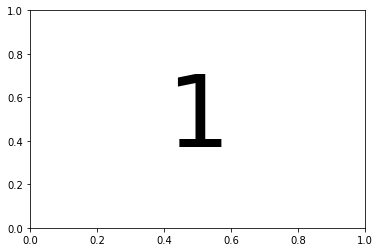

In [64]:
from random import randint
# выбираем случайное изображение из датасета
random_index = randint(0, 15000)
image_to_predict = X_test[random_index]
plot_image(image_to_predict)

predicted_results = model.predict(image_to_predict.reshape((1, -1)))
probabilities = list(predicted_results[0])
print('\n'.join([str(i)+ ': ' + str(round(e*100))+'%' for i, e in enumerate(probabilities)]))
result = probabilities.index(max(probabilities))

plt.text(0.5, 0.5, result, ha='center', va='center', size=100)
plt.show()